# Check Images

Here I check the images of runs IDs 13229, 13228, 13227 (bad)

In [1]:
! eups list -s lsst_distrib

   gdf42428520+f51fc98903 	current w_2023_23 setup


In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import lsst.daf.butler as daf_butler
import lsst.afw.math as afw_math
from matplotlib import pyplot as plt
from astropy.stats import sigma_clip
from scipy.stats import skew
from matplotlib.patches import Rectangle

import lsst.afw.display as afwDisplay
from astropy.visualization import imshow_norm, MinMaxInterval,AsinhStretch,LinearStretch,SqrtStretch,ContrastBiasStretch,ZScaleInterval,AsymmetricPercentileInterval,ManualInterval

# from myutils import *

In [3]:
import seaborn as sns
sns.set_context('talk')

# Run 13229, 13228, 13227

In [4]:
## Example
repo = '/sdf/group/rubin/repo/main/butler.yaml'
collections = ['LSSTCam/raw/all']
butler_raw = daf_butler.Butler(repo, collections=collections)

run = '13229'
detnum = 166  # R41_S11 

where = "exposure.science_program='%s' and exposure.observation_type='spot' " % (run)
dsrefs = list(set(butler_raw.registry.queryDatasets('raw', where=where,detector=detnum).expanded()))

### Query all images inside the run 13229

In [5]:
# detector number goes from 000 to 188 for the science rafts
run13229 = dict()
where = "exposure.science_program='%s' and exposure.observation_type='spot' " % ('13229')
for detnum in np.arange(189):
    run13229['%i'%detnum] = list(set(butler_raw.registry.queryDatasets('raw', where=where,detector=detnum).expanded()))
print('Saved all detectors entries in run 13229')

Saved all detectors entries in run 13229


Text(0.5, 1.0, 'Run 13229')

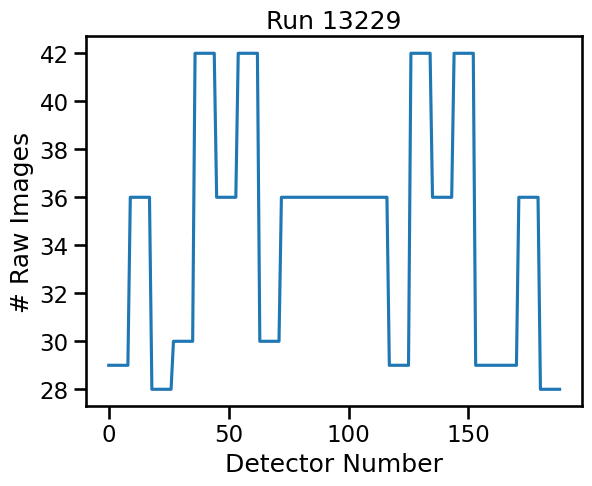

In [6]:
numImages = [len(run13229['%i'%detnum]) for detnum in np.arange(189)]
plt.plot(np.arange(189),numImages)
plt.xlabel('Detector Number')
plt.ylabel('# Raw Images')
plt.title('Run 13229')

### Query all images inside the run 13228

In [7]:
# detector number goes from 000 to 188 for the science rafts
run13228 = dict()
where = "exposure.science_program='%s' and exposure.observation_type='spot' " % ('13228')
for detnum in np.arange(189):
    run13228['%i'%detnum] = list(set(butler_raw.registry.queryDatasets('raw', where=where,detector=detnum).expanded()))
print('Saved all detectors entries in run 13228')

Saved all detectors entries in run 13228


Text(0.5, 1.0, 'Run 13228')

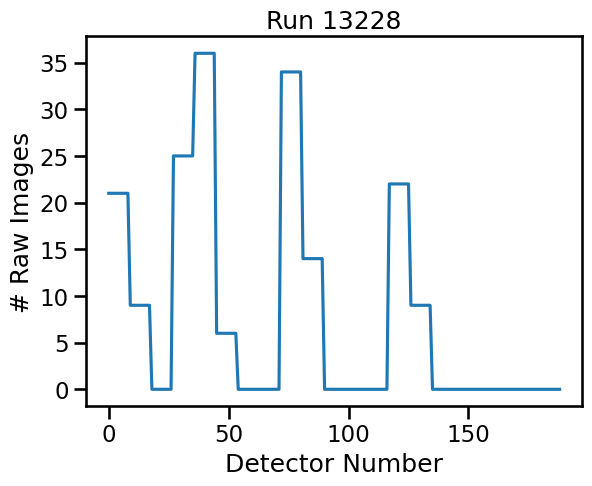

In [8]:
numImages = [len(run13228['%i'%detnum]) for detnum in np.arange(189)]
plt.plot(np.arange(189),numImages)
plt.xlabel('Detector Number')
plt.ylabel('# Raw Images')
plt.title('Run 13228')

### Query all images inside the run 13227

In [9]:
# detector number goes from 000 to 188 for the science rafts
run13227 = dict()
where = "exposure.science_program='%s' and exposure.observation_type='spot' " % ('13227')
for detnum in np.arange(189):
    run13227['%i'%detnum] = list(set(butler_raw.registry.queryDatasets('raw', where=where,detector=detnum).expanded()))
print('Saved all detectors entries in run 13227')

Saved all detectors entries in run 13227


Text(0.5, 1.0, 'Run 13227')

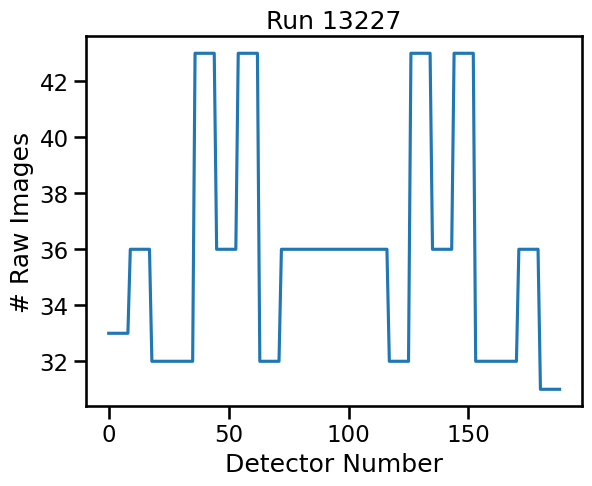

In [10]:
numImages = [len(run13227['%i'%detnum]) for detnum in np.arange(189)]
plt.plot(np.arange(189),numImages)
plt.xlabel('Detector Number')
plt.ylabel('# Raw Images')
plt.title('Run 13227')

## Check Corrupted Images

Take a look at the number of images per detector

Text(0, 0.5, '# Raw Images')

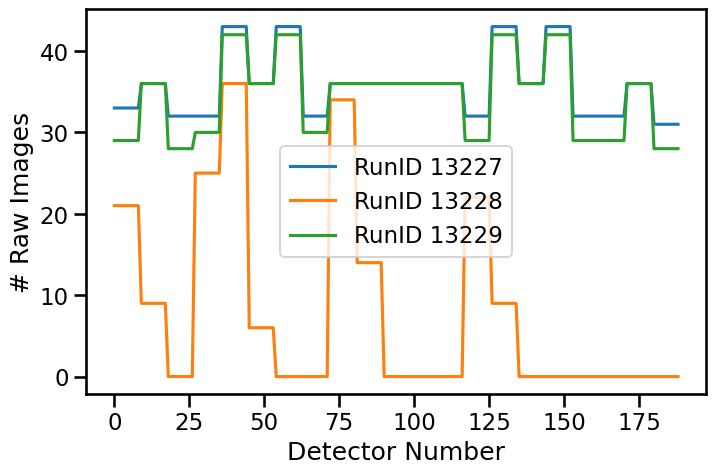

In [11]:
plt.figure(figsize=(8,5))

i=0
for tmp, runId in zip([run13227,run13228,run13229],[13227,13228,13229]):
    numImages = [len(tmp['%i'%detnum]) for detnum in np.arange(189)]
    h = plt.plot(np.arange(189),numImages,label='RunID %i'%runId)
    i=+1
    
plt.xlabel('Detector Number')
plt.legend()
plt.ylabel('# Raw Images')

## Check Run 12 Jun

In [25]:
from lsst.daf.butler import Butler

collections = 'LSSTCam/raw/all,LSSTCam/calib,u/jesteves/2023.06.12/test_a'.split(",")
butler = Butler(repo,collections=collections)
registry = butler.registry

In [26]:
# detector number goes from 000 to 188 for the science rafts
run13229 = dict()
where = "exposure.science_program='%s' and exposure.observation_type='spot' " % ('13229')
for detnum in np.arange(189):
    run13229['%i'%detnum] = list(set(butler.registry.queryDatasets('postISRCCD', where=where,detector=detnum).expanded()))
print('Saved all detectors entries in run 13229')

Saved all detectors entries in run 13229


In [27]:
nAll, nSpots = [],[]
for detnum in np.arange(189):
    datasetRefs = run13229['%i'%detnum]
    _nall = np.array([len(butler.get('spotSrc',datasetRefs[i].dataId).asAstropy()) for i in range(len(datasetRefs))])
    nAll.append(_nall.size)
    nSpots.append(np.where(_nall>500.)[0].size)

In [30]:
np.where(np.array(nSpots)>0)[0]

array([ 32, 112, 166])

## Display Images

Check if the sources are well behaved.

Lines based on Yousuke's notebook example: https://github.com/youtsumi/JohnnyPaper/blob/main/ExampleImage.ipynb

In [31]:
from lsst.daf.butler import Butler

collections = 'LSSTCam/raw/all,LSSTCam/calib,u/jesteves/2023.06.12/test_a'.split(",")
butler = Butler(repo,collections=collections)
registry = butler.registry

### 13229

In [32]:
kwargs={
"datasetType": "postISRCCD",
"collections": collections,
"where":
"""
instrument='LSSTCam' and
exposure.science_program in ( '13229' ) and
detector=32
"""
}

datasetRefs = list(registry.queryDatasets(**kwargs))
print( f"You have {len(datasetRefs)} in this repository with the condition supplied {kwargs}")

You have 30 in this repository with the condition supplied {'datasetType': 'postISRCCD', 'collections': ['LSSTCam/raw/all', 'LSSTCam/calib', 'u/jesteves/2023.06.12/test_a'], 'where': "\ninstrument='LSSTCam' and\nexposure.science_program in ( '13229' ) and\ndetector=32\n"}


In [52]:
def plot_image_lookup(img, cat, vmin=0., vmax=5e3):
    vmin,vmax = np.nanpercentile(img.image.array,[5,95])
    x,y=cat.asAstropy()["base_SdssCentroid_x","base_SdssCentroid_y"][120]

    fig,axs = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
    common={
        "vmin": vmin,
        "vmax": vmax,
        "norm": "asinh"
    }
    axs[0].imshow(img.image.array,cmap="gray",origin="lower",**common)


    axs[0].set_title("The whole sensor view")
    w=100
    axs[0].add_patch(Rectangle((x-w+1,y-w+1),2*w+1,2*w+1,color="red",facecolor="none",fill=None))

    p=axs[1].imshow(img[x-w+1:x+w+1,y-w+1:y+w+1].image.array,cmap="gray",origin="lower",**common)
    axs[1].set_xticklabels(np.arange(x-w+1,x+w+1,20).astype(int))
    axs[1].set_yticklabels(np.arange(y-w+1,y+w+1,20).astype(int))
    axs[1].set_title("Close-up")
    for ax in axs:
        ax.set_xlabel("X in pixel")
        ax.set_ylabel("Y in pixel")    

    fig.colorbar(p,label="Flux [e-]")
    #fig.suptitle(raw.getMetadata()["LSST_NUM"])
    fig.tight_layout()


/tmp/ipykernel_15643/2523686707.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].add_patch(Rectangle((x-w+1,y-w+1),2*w+1,2*w+1,color="red",facecolor="none",fill=None))
/tmp/ipykernel_15643/2523686707.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(np.arange(x-w+1,x+w+1,20).astype(int))
/tmp/ipykernel_15643/2523686707.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.arange(y-w+1,y+w+1,20).astype(int))


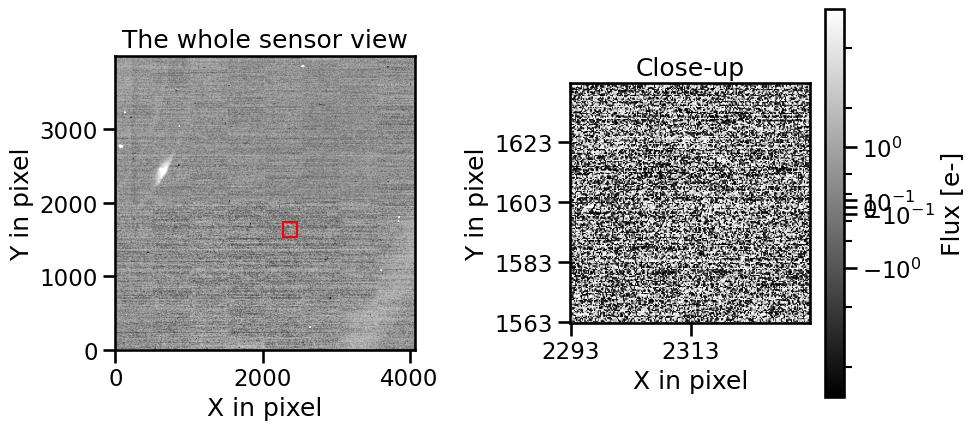

In [53]:
img = butler.get(datasetRefs[4])
cat = butler.get('spotSrc',datasetRefs[4].dataId)
plot_image_lookup(img, cat)

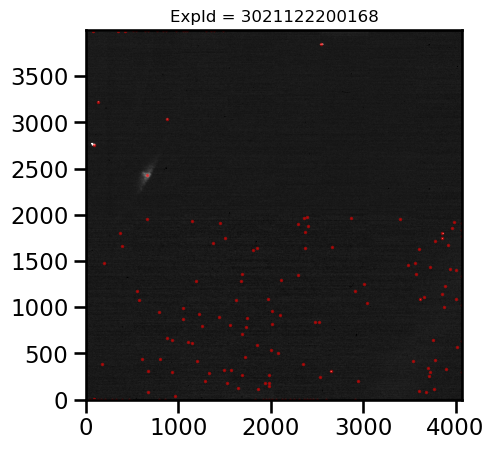

In [57]:
plot_image_cat(img, cat)

In [65]:
cat['base_SdssShape_instFluxErr']/cat['base_SdssShape_instFlux']

array([0.037884  ,        nan, 0.03228156, 0.03472465,        nan,
       0.02735717, 0.03167036,        nan, 0.02607795, 0.03202757,
              nan,        nan, 0.03134148,        nan, 0.01537117,
              nan, 0.03768839, 0.00415331, 0.00247795,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.00269501, 0.00272136,        nan,        nan,
              nan, 0.13260678,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.04387087,
       0.05528814,        nan,        nan,        nan,        nan,
              nan,        nan, 0.03904981,        nan, 0.03435386,
              nan, 0.01460218,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.03131516, 0.46499767,        nan, 0.02979372, 0.04843996,
              nan,        nan,        nan,        nan, 0.04086083,
       0.03512855, 0.02294832,        nan,        nan, 0.04324

In [1]:
# cat.asAstropy().columns

/tmp/ipykernel_15643/3814163450.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].add_patch(Rectangle((x-w+1,y-w+1),2*w+1,2*w+1,color="red",facecolor="none",fill=None))
/tmp/ipykernel_15643/3814163450.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(np.arange(x-w+1,x+w+1,20).astype(int))
/tmp/ipykernel_15643/3814163450.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.arange(y-w+1,y+w+1,20).astype(int))


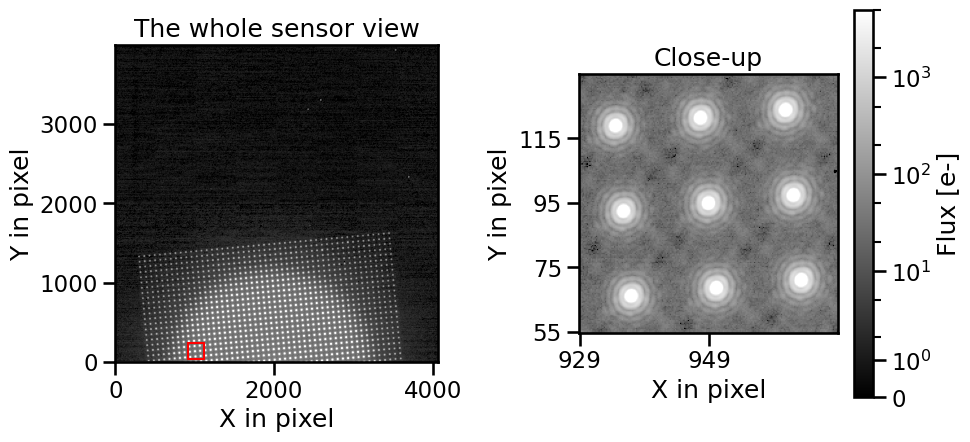

In [50]:
img = butler.get(datasetRefs[2])
cat = butler.get('spotSrc',datasetRefs[2].dataId)
plot_image_lookup(img, cat)

/tmp/ipykernel_15643/3814163450.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].add_patch(Rectangle((x-w+1,y-w+1),2*w+1,2*w+1,color="red",facecolor="none",fill=None))
/tmp/ipykernel_15643/3814163450.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(np.arange(x-w+1,x+w+1,20).astype(int))
/tmp/ipykernel_15643/3814163450.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.arange(y-w+1,y+w+1,20).astype(int))


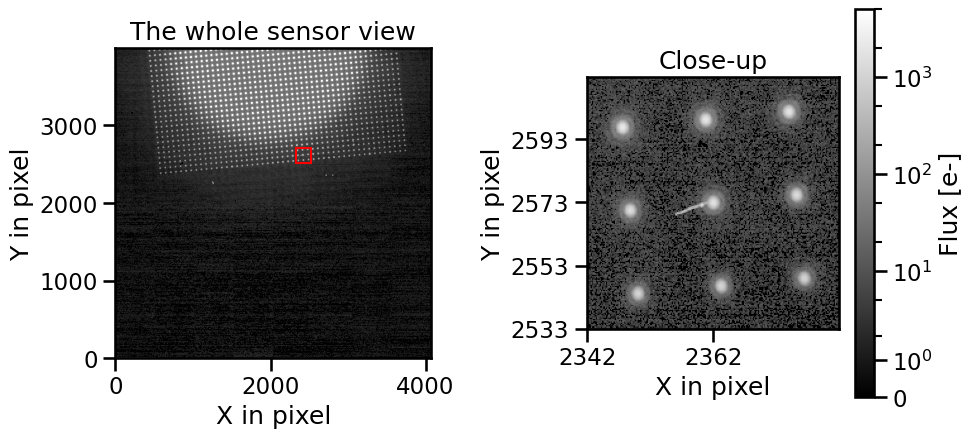

In [51]:
img = butler.get(datasetRefs[5])
cat = butler.get('spotSrc',datasetRefs[5].dataId)
plot_image_lookup(img, cat)

/tmp/ipykernel_12076/977289028.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].add_patch(Rectangle((x-w+1,y-w+1),2*w+1,2*w+1,color="red",facecolor="none",fill=None))
/tmp/ipykernel_12076/977289028.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(np.arange(x-w+1,x+w+1,20).astype(int))
/tmp/ipykernel_12076/977289028.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.arange(y-w+1,y+w+1,20).astype(int))


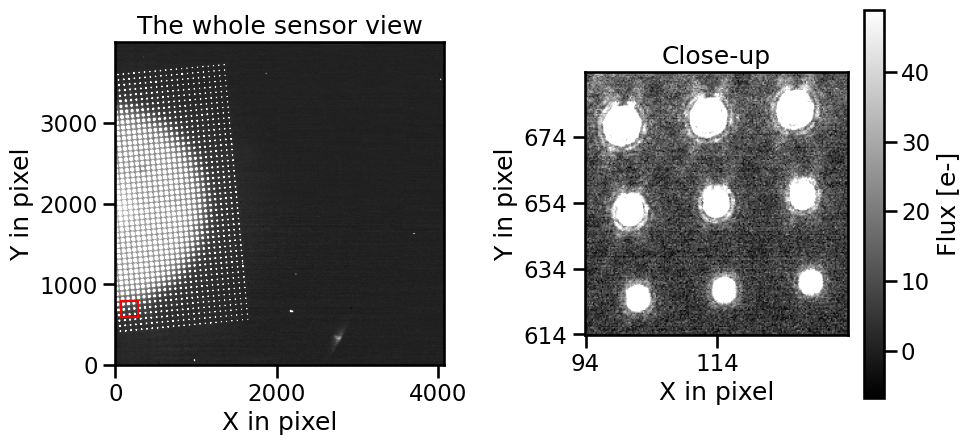

In [300]:
img = butler.get(datasetRefs[13])
cat = butler.get('spotSrc',datasetRefs[13].dataId)
plot_image_lookup(img, cat)

(array([26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([ 143. ,  250.2,  357.4,  464.6,  571.8,  679. ,  786.2,  893.4,
        1000.6, 1107.8, 1215. ]),
 <BarContainer object of 10 artists>)

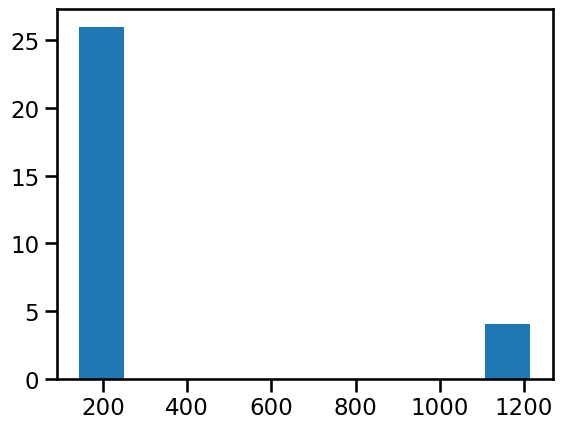

In [301]:
nSrcs = [len(butler.get('spotSrc',datasetRefs[i].dataId).asAstropy()) for i in range(len(datasetRefs))]
plt.hist(nSrcs)

In [302]:
spots = np.where(np.array(nSrcs)>400)[0]
spots

array([ 2,  5, 13, 14])

/tmp/ipykernel_12076/977289028.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].add_patch(Rectangle((x-w+1,y-w+1),2*w+1,2*w+1,color="red",facecolor="none",fill=None))
/tmp/ipykernel_12076/977289028.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(np.arange(x-w+1,x+w+1,20).astype(int))
/tmp/ipykernel_12076/977289028.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.arange(y-w+1,y+w+1,20).astype(int))


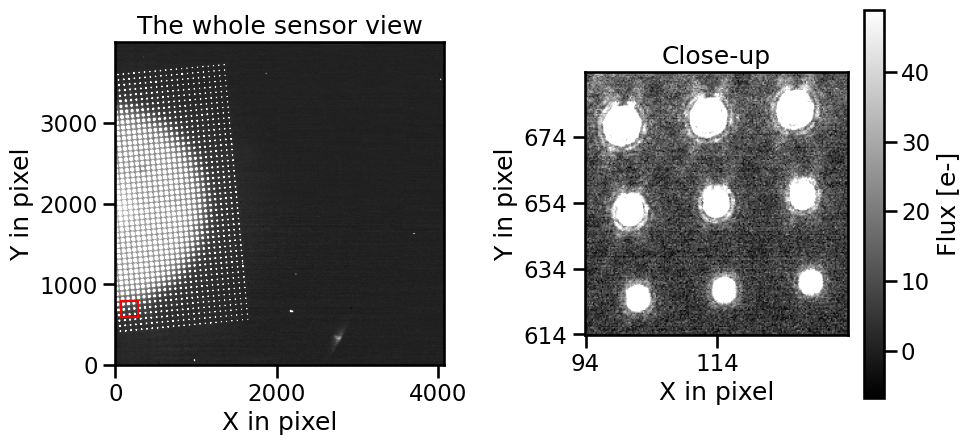

In [303]:
img = butler.get(datasetRefs[13])
cat = butler.get('spotSrc',datasetRefs[13].dataId)
plot_image_lookup(img, cat)

In [56]:
def plot_image_cat(img, cat, axs=None, vmin=-5, vmax=50):
    if axs is None: axs = plt.gca()
    x,y=cat.asAstropy()['base_SdssCentroid_x'],cat.asAstropy()['base_SdssCentroid_y']
    axs.scatter(x,y,s=1,color='r',alpha=0.5)
    common={
        "vmin": vmin,
        "vmax": vmax
        #"norm": "asinh"
    }
    p = axs.imshow(img.image.array,cmap="gray",origin="lower",**common)
    axs.set_title('ExpId = %i'%img.visitInfo.getId(), fontsize=12)
    return p

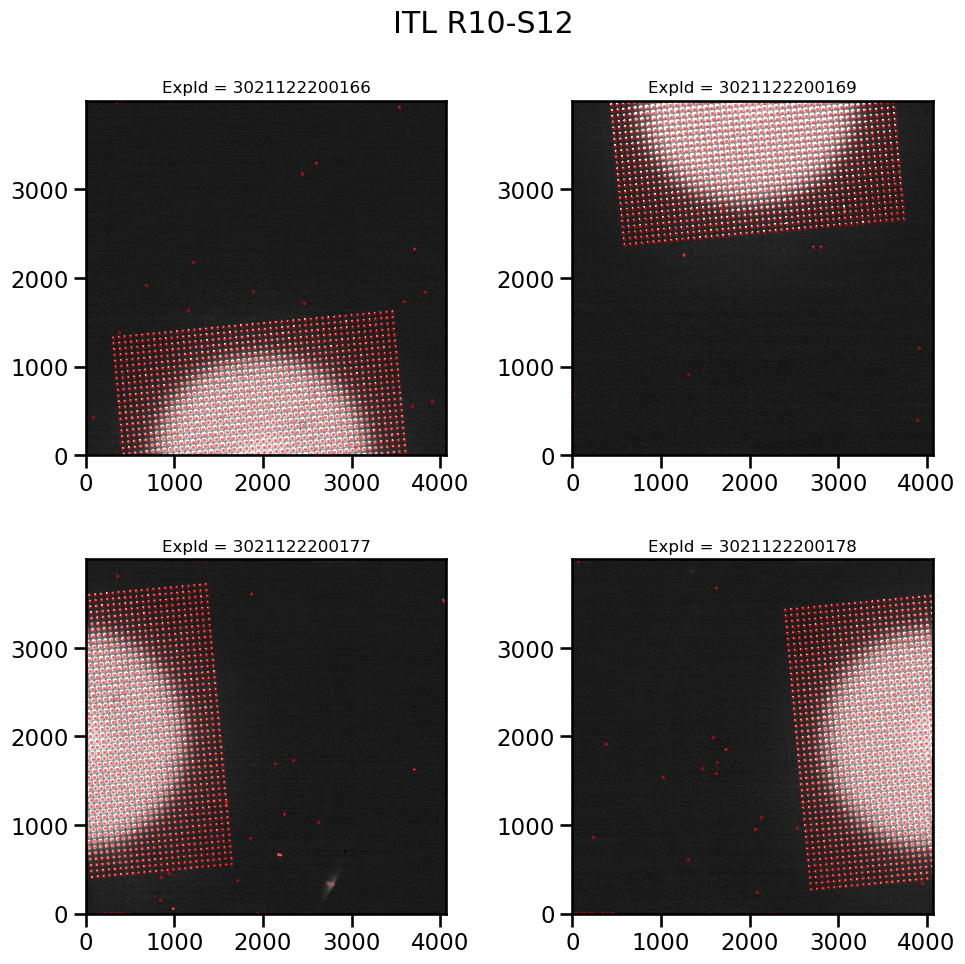

In [305]:
fig,axs = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
axs = axs.flatten()
for i,si in enumerate(spots):
    img = butler.get(datasetRefs[si])
    cat = butler.get('spotSrc',datasetRefs[si].dataId)
    plot_image_cat(img, cat, axs=axs[i])

fig.suptitle('ITL R10-S12')
fig.tight_layout()
fig.savefig('run13229_det32_array.png',dpi=120)

### Other Detector

In [291]:
kwargs={
"datasetType": "postISRCCD",
"collections": collections,
"where":
"""
instrument='LSSTCam' and
exposure.science_program in ( '13229' ) and
detector=166
"""
}

datasetRefs = list(registry.queryDatasets(**kwargs))
print( f"You have {len(datasetRefs)} in this repository with the condition supplied {kwargs}")

You have 29 in this repository with the condition supplied {'datasetType': 'postISRCCD', 'collections': ['LSSTCam/raw/all', 'LSSTCam/calib', 'u/jesteves/2023.06.12/test_a'], 'where': "\ninstrument='LSSTCam' and\nexposure.science_program in ( '13229' ) and\ndetector=166\n"}


(array([23.,  0.,  0.,  0.,  1.,  1.,  0.,  3.,  0.,  1.]),
 array([  31. ,  187.6,  344.2,  500.8,  657.4,  814. ,  970.6, 1127.2,
        1283.8, 1440.4, 1597. ]),
 <BarContainer object of 10 artists>)

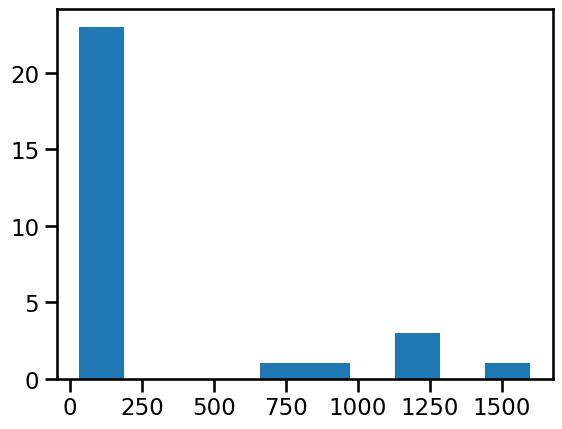

In [292]:
nSrcs = [len(butler.get('spotSrc',datasetRefs[i].dataId).asAstropy()) for i in range(len(datasetRefs))]
plt.hist(nSrcs)

In [293]:
spots=np.where(np.array(nSrcs)>500)[0]
spots

array([ 7, 10, 15, 16, 18, 19])

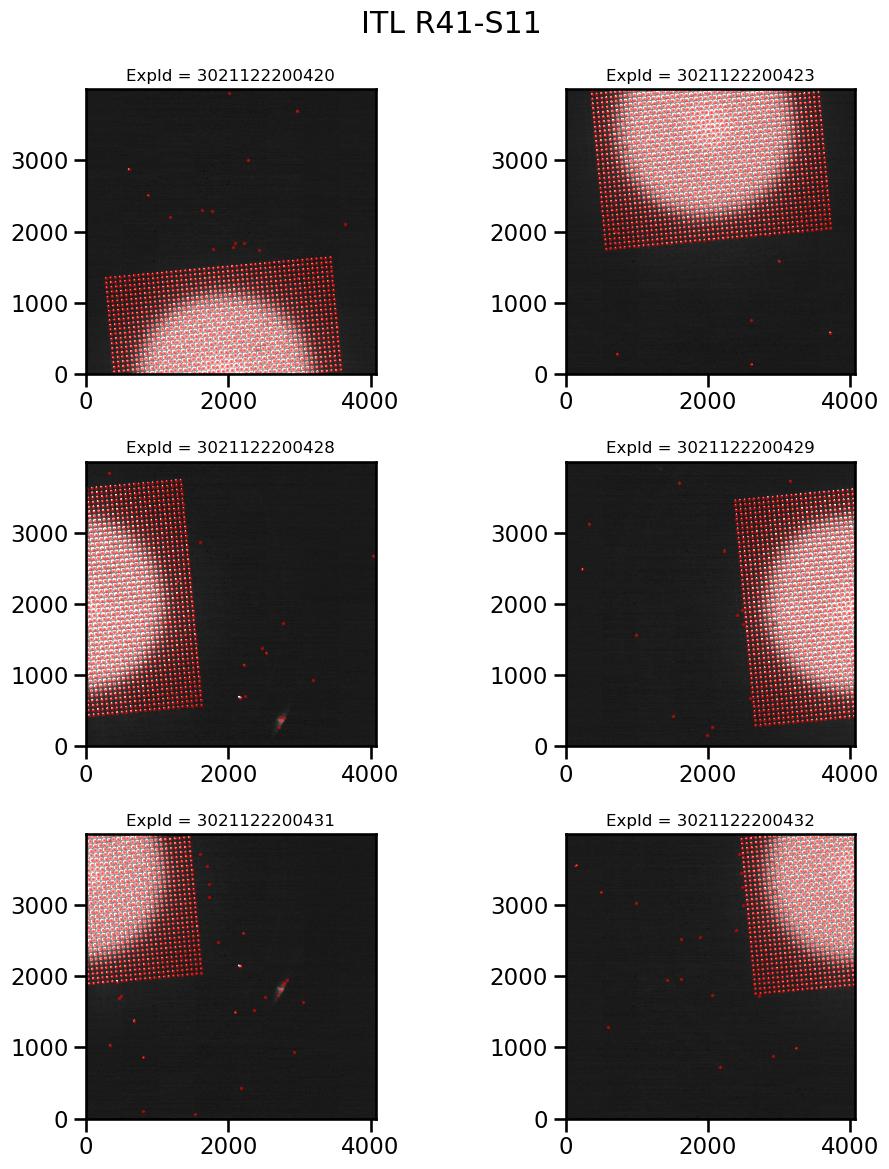

In [294]:
fig,axs = plt.subplots(nrows=3, ncols=2,figsize=(10,12))
axs = axs.flatten()
for i,si in enumerate(spots):
    img = butler.get(datasetRefs[si])
    cat = butler.get('spotSrc',datasetRefs[si].dataId)
    plot_image_cat(img, cat, axs=axs[i])

fig.suptitle('ITL R41-S11')
fig.tight_layout()
fig.savefig('run13229_det166_array.png',dpi=120)

In [66]:
## Debug

In [13]:
from lsst.daf.butler import Butler
repo = '/sdf/group/rubin/repo/main/butler.yaml'
collections = 'u/jesteves/2023.06.12/det32Pair'
butler = Butler(repo,collections=collections)
registry = butler.registry

In [14]:
for dtype in registry.queryDatasetTypes():
    try:
        datasetRefs = list(registry.queryDatasets(datasetType=dtype,collections=collections))
        if len(datasetRefs)>1:
            print(len(datasetRefs), dtype)
    except:
        i=1

378 DatasetType('defects', {instrument, detector}, Defects, isCalibration=True)
378 DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
378 DatasetType('flat', {band, instrument, detector, physical_filter}, ExposureF, isCalibration=True)
378 DatasetType('dark', {instrument, detector}, ExposureF, isCalibration=True)
2 DatasetType('packages', {}, Packages)
248 DatasetType('postISRCCD', {band, instrument, detector, physical_filter, exposure}, Exposure)
248 DatasetType('isr_metadata', {band, instrument, detector, physical_filter, exposure}, PropertySet)
2 DatasetType('isr_config', {}, Config)
378 DatasetType('linearizer', {instrument, detector}, Linearizer, isCalibration=True)
248 DatasetType('isr_log', {band, instrument, detector, physical_filter, exposure}, ButlerLogRecords)
2 DatasetType('gridFit_config', {}, Config)
2 DatasetType('spotSrc_schema', {}, SourceCatalog)
2 DatasetType('characterizeSpots_config', {}, Config)
248 DatasetType('spotSrc', {band, instrument

In [19]:
kwargs={
"datasetType": "gridSpotSrc",
"collections": collections,
"where":
"""
instrument='LSSTCam' and
exposure.science_program in ( '13229' ) and
detector in (32,31)
"""
}

datasetRefs = list(registry.queryDatasets(**kwargs))
print( f"You have {len(datasetRefs)} in this repository with the condition supplied {kwargs}")

You have 13 in this repository with the condition supplied {'datasetType': 'gridSpotSrc', 'collections': 'u/jesteves/2023.06.12/det32Pair', 'where': "\ninstrument='LSSTCam' and\nexposure.science_program in ( '13229' ) and\ndetector in (32,31)\n"}


In [97]:
datasetRefs[0]

DatasetRef(DatasetType('gridSpotSrc', {band, instrument, detector, physical_filter, exposure}, SourceCatalog), {instrument: 'LSSTCam', detector: 31, exposure: 3021122200165, ...}, run='u/jesteves/2023.06.12/det32Pair/20230614T000412Z', id=6b574600-b251-404f-b316-9ee64b2b06ce)

In [27]:
nSrcs = np.array([len(butler.get('gridSpotSrc',datasetRefs[i].dataId).asAstropy()) for i in range(len(datasetRefs))])

In [64]:
sel = np.where(np.array(nSrcs)>10)[0]
sel.size

8

In [102]:
datas = [datasetRefs[i] for i in sel]
datas[0].dataId

{instrument: 'LSSTCam', detector: 31, exposure: 3021122200165, ...}

In [73]:
list(cat.getMetadata())

['BASE_CIRCULARAPERTUREFLUX_RADII',
 'NOISE_SEED_MULTIPLIER',
 'NOISE_SOURCE',
 'NOISE_OFFSET',
 'NOISE_EXPOSURE_ID',
 'BOTXCAM',
 'BOTYCAM',
 'GRID_X0',
 'GRID_X0ERR',
 'GRID_Y0',
 'GRID_Y0ERR',
 'GRID_THETA',
 'GRID_THETAERR',
 'GRID_XSTEP',
 'GRID_YSTEP',
 'GRID_NCOLS',
 'GRID_NROWS',
 'FIT_NFEV',
 'FIT_SUCCESS',
 'FIT_NDATA',
 'FIT_CHISQR',
 'FIT_REDCHI']

In [175]:
def get_xy_bot(dataID):
    cat = butler.get('gridSpotSrc',dataID.dataId)
    return cat.getMetadata()['GRID_X0'],cat.getMetadata()['GRID_Y0']

In [176]:
list(butler.get('gridSpotSrc',datas[0].dataId).getMetadata())

['BASE_CIRCULARAPERTUREFLUX_RADII',
 'NOISE_SEED_MULTIPLIER',
 'NOISE_SOURCE',
 'NOISE_OFFSET',
 'NOISE_EXPOSURE_ID',
 'BOTXCAM',
 'BOTYCAM',
 'GRID_X0',
 'GRID_X0ERR',
 'GRID_Y0',
 'GRID_Y0ERR',
 'GRID_THETA',
 'GRID_THETAERR',
 'GRID_XSTEP',
 'GRID_YSTEP',
 'GRID_NCOLS',
 'GRID_NROWS',
 'FIT_NFEV',
 'FIT_SUCCESS',
 'FIT_NDATA',
 'FIT_CHISQR',
 'FIT_REDCHI']

In [177]:
centers = np.array([get_xy_bot(dR) for dR in datas])

In [178]:
centers[0]

array([2053.6075057 , -106.68842827])

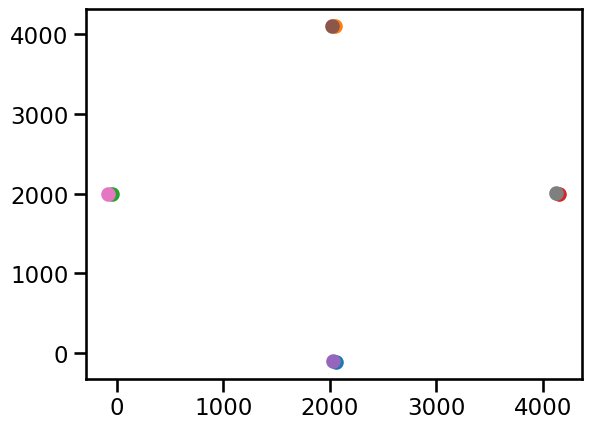

In [179]:
for i in range(8):
    plt.scatter(*centers[i])

In [180]:
deltaR, deltal = [], []
for i in range(8):
    centersI = centers.copy()
    centersI[i] = np.array([2000,2000.])
    dl = centers[i] - centersI
    dR = np.hypot(dl[:,0],dl[:,1])
    ixmin = np.argmin(dR)

    deltaR.append(dR[ixmin])
    deltal.append(dl[ixmin])

In [181]:
deltal

[array([28.76274428, -4.89704492]),
 array([34.44539762, -4.98663123]),
 array([32.44169684, -1.80274783]),
 array([31.1883841 , -7.35144654]),
 array([-28.76274428,   4.89704492]),
 array([-34.44539762,   4.98663123]),
 array([-32.44169684,   1.80274783]),
 array([-31.1883841 ,   7.35144654])]

In [200]:
def plot_image_cat(dRef, axs=None, vmin=0., vmax=6e3):
    img = butler.get('postISRCCD', dRef.dataId)
    cat = butler.get('gridSpotSrc',dRef.dataId)

    if axs is None: axs = plt.gca()
    x,y=cat.asAstropy()['base_SdssCentroid_x'],cat.asAstropy()['base_SdssCentroid_y']
    axs.scatter(x,y,s=1,color='r',alpha=0.5)
    common={
        "vmin": vmin,
        "vmax": vmax,
        "norm": "asinh"
    }
    p = axs.imshow(img.image.array,cmap="gray",origin="lower",**common)
    axs.set_title('ExpId = %i'%img.visitInfo.getId(), fontsize=12)
    return p

def plot_tier(datalist,detnum=32):
    fig,axs = plt.subplots(nrows=1, ncols=4,figsize=(12,3))
    for i in range(4):
        plot_image_cat(datalist[i], axs=axs[i])
        
    fig.tight_layout()
    fig.suptitle('Detector = %i'%detnum, fontsize=12)

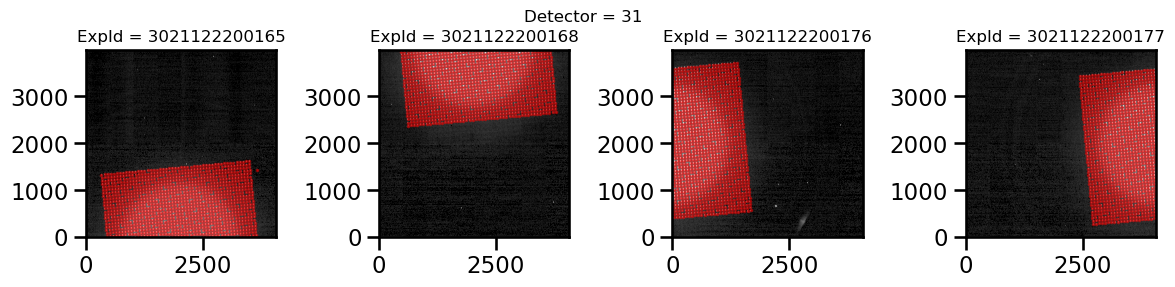

In [211]:
plot_tier(datas[:4],detnum=31)

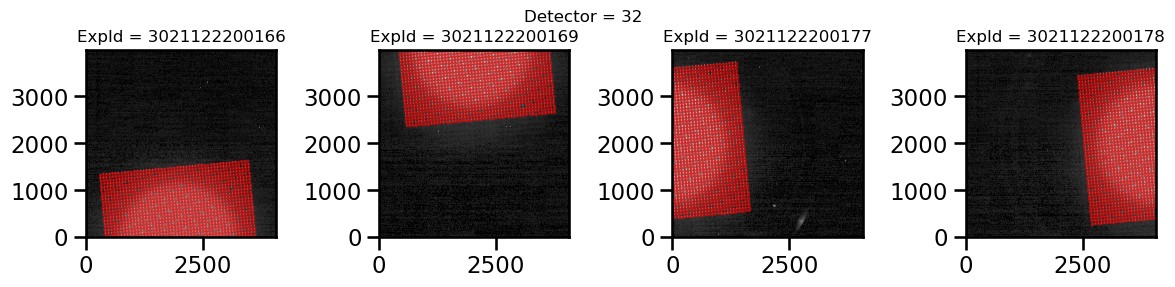

In [212]:
plot_tier(datas[4:], detnum=32)

In [185]:
centers

array([[2053.6075057 , -106.68842827],
       [2052.9964787 , 4094.6047071 ],
       [ -47.38748094, 1993.51712088],
       [4155.08139923, 1994.27928678],
       [2024.84476142, -101.79138335],
       [2018.55108108, 4099.59133832],
       [ -79.82917778, 1995.31986872],
       [4123.89301513, 2001.63073332]])

In [194]:
spacing = centers[3]-(np.array([4072,0.]) + np.array([-1.,+1])*centers[6])
spacing

array([ 3.25222145, -1.04058194])

In [199]:
np.hypot(*spacing) # pixels

3.4146383573859715

In [219]:
np.arctan2(*spacing)* 180 / np.pi

107.74261128206582

In [187]:
datas

[DatasetRef(DatasetType('gridSpotSrc', {band, instrument, detector, physical_filter, exposure}, SourceCatalog), {instrument: 'LSSTCam', detector: 31, exposure: 3021122200165, ...}, run='u/jesteves/2023.06.12/det32Pair/20230614T000412Z', id=6b574600-b251-404f-b316-9ee64b2b06ce),
 DatasetRef(DatasetType('gridSpotSrc', {band, instrument, detector, physical_filter, exposure}, SourceCatalog), {instrument: 'LSSTCam', detector: 31, exposure: 3021122200168, ...}, run='u/jesteves/2023.06.12/det32Pair/20230614T000412Z', id=b4fa0db0-ea70-4b53-8723-fcf8f2cced94),
 DatasetRef(DatasetType('gridSpotSrc', {band, instrument, detector, physical_filter, exposure}, SourceCatalog), {instrument: 'LSSTCam', detector: 31, exposure: 3021122200176, ...}, run='u/jesteves/2023.06.12/det32Pair/20230614T000412Z', id=076899f0-a8b5-4ac5-a220-fda2dd125c3d),
 DatasetRef(DatasetType('gridSpotSrc', {band, instrument, detector, physical_filter, exposure}, SourceCatalog), {instrument: 'LSSTCam', detector: 31, exposure: 302

In [188]:
for i in range(8):
    print(i, datas[i].dataId['exposure'], datas[i].dataId['detector'])

0 3021122200165 31
1 3021122200168 31
2 3021122200176 31
3 3021122200177 31
4 3021122200166 32
5 3021122200169 32
6 3021122200177 32
7 3021122200178 32


In [189]:
img = butler.get('postISRCCD', datas[0].dataId)
img.image.array.shape

(4000, 4072)

In [210]:
# cat.asAstropy()['spotgrid_index']